In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Project Task: Week 1
## Data Exploration:
**1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose • BloodPressure • SkinThickness • Insulin • BMI**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2. Visually explore these variables using histograms. Treat the missing values accordingly.**

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

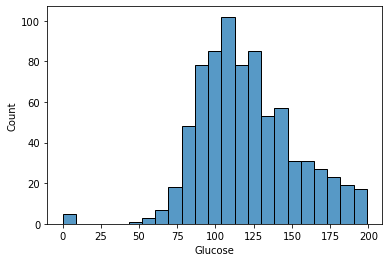

In [5]:
sns.histplot(data['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

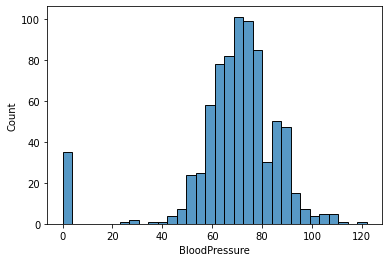

In [6]:
sns.histplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

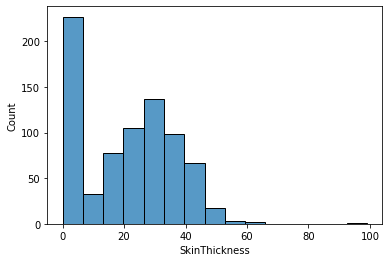

In [7]:
sns.histplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

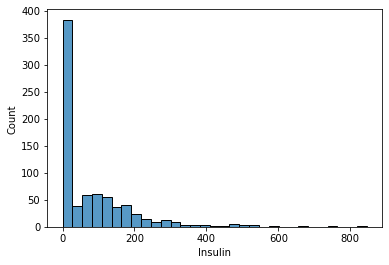

In [8]:
sns.histplot(data['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

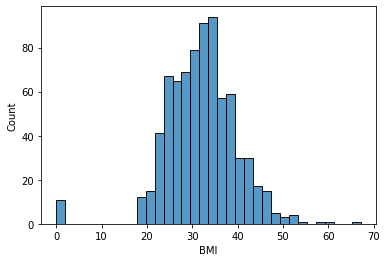

In [9]:
sns.histplot(data['BMI'])

In [10]:
print('Number of missing values in Glucose :',data[data['Glucose']==0].shape[0])
print('Number of missing values in BloodPressure :',data[data['BloodPressure']==0].shape[0])
print('Number of missing values in SkinThickness :',data[data['SkinThickness']==0].shape[0])
print('Number of missing values in Insulin :',data[data['Insulin']==0].shape[0])
print('Number of missing values in BMI :',data[data['BMI']==0].shape[0])

Number of missing values in Glucose : 5
Number of missing values in BloodPressure : 35
Number of missing values in SkinThickness : 227
Number of missing values in Insulin : 374
Number of missing values in BMI : 11


# Observations :
* <h4 style="color:blue">After analyzing the histogram we can identify that there are some outliers in some columns.</h4>
<b>For Example:- </b>
<ul>
    <li>BloodPressure - A living person cannot have a diastolic blood pressure of zero.</li>
    <li>Plasma glucose levels - Zero is invalid number as fasting glucose level would never be as low as zero. </li>
    <li>Skin Fold Thickness - For normal people, skin fold thickness can’t be less than 10 mm better yet zero. </li>
    <li>BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.</li>
    <li>Insulin: In a rare situation a person can have zero insulin but by observing</li>
</ul>
* We also found lots of 0.
* **Number of missing values in (Glucose is 5), (BloodPressure is 35), (SkinThickness is 227), (Insulin is 374) & (BMI is 11).**

In [11]:
df = data.groupby(['Age','Outcome']).mean()

df['Age']= df.index.get_level_values(0)
df['Outcome']= df.index.get_level_values(1)

df.reset_index(drop=True, inplace=True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.120690,105.637931,65.517241,18.517241,68.862069,26.977586,0.415828,21,0
1,0.600000,139.400000,70.800000,29.000000,129.000000,37.560000,0.642600,21,1
2,1.442623,99.983607,62.163934,20.163934,68.655738,28.511475,0.389574,22,0
3,2.181818,153.818182,72.363636,22.272727,106.818182,35.045455,0.658273,22,1
4,1.516129,109.032258,64.387097,23.935484,134.096774,30.693548,0.431581,23,0


In [12]:
# Pop the 'outcome' column and store it in a variable
outcome_col = df.pop('Outcome')

In [13]:
# Apply function on the modified DataFrame

# function to replace 0 values
def replace_with_above(col):
    for i in range(1, len(col)):
        if col[i] == 0:
            col[i] = col[i-1]
    return col

# apply function to each column
df = df.apply(replace_with_above)

# Add the column back to the DataFrame
df = df.assign(Outcome=outcome_col)

# Print the modified DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.120690,105.637931,65.517241,18.517241,68.862069,26.977586,0.415828,21,0
1,0.600000,139.400000,70.800000,29.000000,129.000000,37.560000,0.642600,21,1
2,1.442623,99.983607,62.163934,20.163934,68.655738,28.511475,0.389574,22,0
3,2.181818,153.818182,72.363636,22.272727,106.818182,35.045455,0.658273,22,1
4,1.516129,109.032258,64.387097,23.935484,134.096774,30.693548,0.431581,23,0


In [14]:
for index, row in data.iterrows():
    # Check if Age and Outcome match in df
    match = df[(df['Age'] == row['Age']) & (df['Outcome'] == row['Outcome'])]
    if match.empty:
        continue
    # If match is found, replace 0 in data with value from df for Glucose column
    data.at[index, 'Glucose'] = match['Glucose'].values[0]
    # If match is found, replace 0 in data with value from df for BloodPressure column
    data.at[index, 'BloodPressure'] = match['BloodPressure'].values[0]
    # If match is found, replace 0 in data with value from df for SkinThickness column
    data.at[index, 'SkinThickness'] = match['SkinThickness'].values[0]
    # If match is found, replace 0 in data with value from df for Insulin column
    data.at[index, 'Insulin'] = match['Insulin'].values[0]
    # If match is found, replace 0 in data with value from df for BMI column
    data.at[index, 'BMI'] = match['BMI'].values[0]

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,141.400000,74.000000,17.000000,28.800000,30.340000,0.627,50,1
1,1,112.818182,57.727273,16.090909,121.363636,30.936364,0.351,31,0
2,8,128.888889,69.222222,17.111111,38.000000,33.877778,0.672,32,1
3,1,105.637931,65.517241,18.517241,68.862069,26.977586,0.167,21,0
4,0,139.000000,67.400000,19.300000,105.000000,32.660000,2.288,33,1


**3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.**

In [15]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
# select the columns to convert
cols_to_convert = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# convert the selected columns to int64
data[cols_to_convert] = data[cols_to_convert].astype('int64')

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

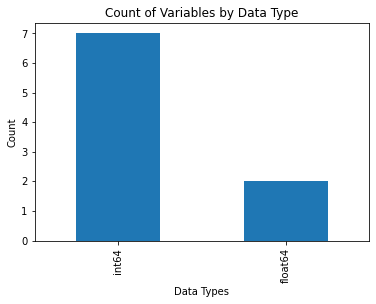

In [17]:
# count the number of variables of each data type
data.dtypes.value_counts().plot(kind='bar')

plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Count of Variables by Data Type')
plt.show()

# Observations :
* The original dataframe contained 7 integer and 2 float values, but after preprocessing, it was transformed into 3 integer and 6 float values. We will revert it to the original format.

# Project Task: Week 2
## Data Exploration:
**1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.**

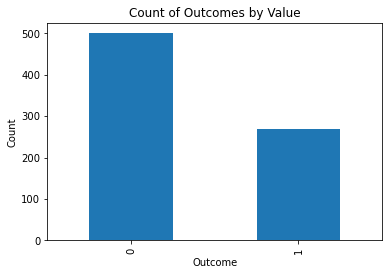

In [18]:
# create a bar plot
data['Outcome'].value_counts().plot(kind='bar')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcomes by Value')

plt.show()

### Observations

 It is an imbalanced dataset where positive outcomes are almost half of the negative outcomes. While creating model, 
 we need to balance the outcomes either by oversampling the minority class or undersampling of majority class. Other 
 workaround could be to do a weighted computation while training the model.

### **2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.**

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

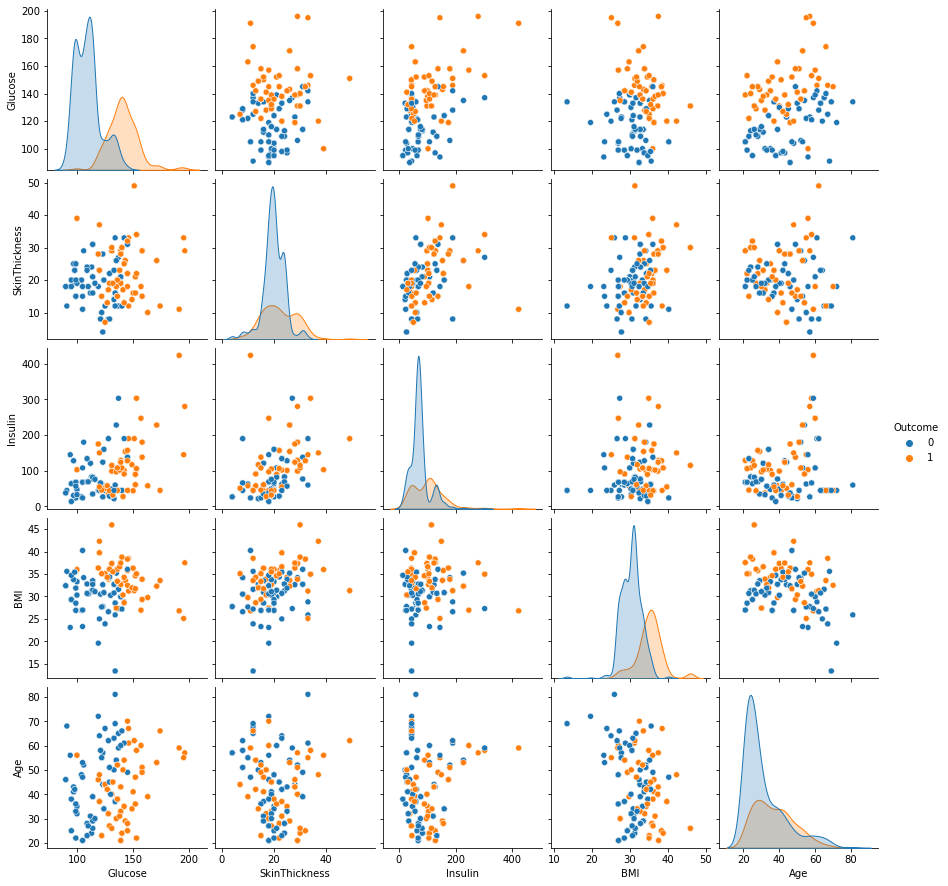

In [20]:
# create scatterplot matrix
sns.pairplot(data, vars = [ 'Glucose', 'SkinThickness', 'Insulin','BMI', 'Age'], hue = 'Outcome')

### **3.Perform correlation analysis. Visually explore it using a heat map.**

<AxesSubplot:>

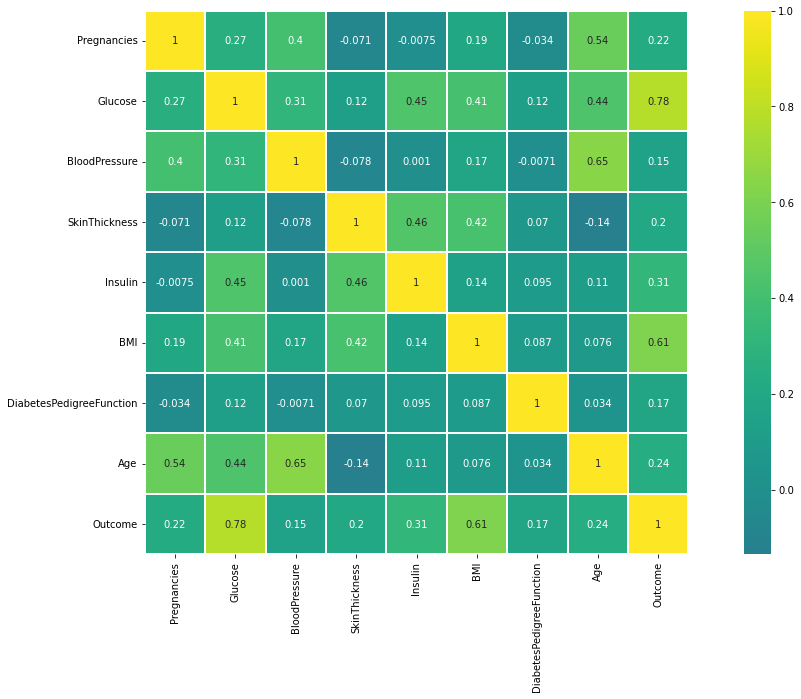

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), center=0, linewidths=1.5, square = True , annot = True , cmap='viridis')

### Observations
**Correlation Analysis**
* Outcome is highly correlated to Glucose `(0.78)` and BMI `(0.61)`.
* Insulin is moderately correlated to Glucose and SkinThickness `&` have a positive correlation.
* Age is moderately correlated to Pregnancies and Glucose `&` highly correlated to BloodPressure `&` have a positive correlation.
* BMI and Skinthickness have a positive correlation.
* Rest other fields are very weakly correlated.

# Project Task: Week 3
## Data Modeling:

**Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# define the features and outcome
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [24]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

### LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# initialize the models
logreg = LogisticRegression()

# fit the models to the training data
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# calculate the accuracy of the models
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# print the accuracy of the models
print("Logistic Regression accuracy :}",acc_logreg)

Logistic Regression accuracy :} 0.9479166666666666


In [27]:
logreg.score(X_test,y_test)

0.9479166666666666

### SVC

In [28]:
from sklearn.svm import SVC

In [29]:
# initialize the models
svm = SVC()

# fit the models to the training data
svm.fit(X_train, y_train)

# make predictions on the test set
y_pred_svm = svm.predict(X_test)

# calculate the accuracy of the models
acc_svm = accuracy_score(y_test, y_pred_svm)

# print the accuracy of the models
print("SVM accuracy :",acc_svm)

SVM accuracy : 0.8541666666666666


### DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# initialize the models
dt = DecisionTreeClassifier()

# fit the models to the training data
dt.fit(X_train, y_train)

# make predictions on the test set
y_pred_dt = dt.predict(X_test)

# calculate the accuracy of the models
acc_dt = accuracy_score(y_test, y_pred_dt)

# print the accuracy of the models
print("Decision Tree accuracy :",acc_dt)

Decision Tree accuracy : 0.9583333333333334


### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# initialize the models
rf = RandomForestClassifier()

# fit the models to the training data
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred_rf = rf.predict(X_test)

# calculate the accuracy of the models
acc_rf = accuracy_score(y_test, y_pred_rf)

# print the accuracy of the models
print("Random Forest accuracy :",acc_rf)

Random Forest accuracy : 0.9791666666666666


## KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# predict on the test set
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNeighborsClassifier accuracy:", accuracy)

KNeighborsClassifier accuracy: 0.953125


In [35]:
data.to_csv('health.csv')

# Project Task: Week 4
## Data Modeling:
**1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.**

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

### Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for `LogisticRegression`

In [37]:
# generate the classification report
report = classification_report(y_test, y_pred_logreg)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       123
           1       0.92      0.94      0.93        69

    accuracy                           0.95       192
   macro avg       0.94      0.95      0.94       192
weighted avg       0.95      0.95      0.95       192



AUC: 0.947
True Positive Rate: [0.         0.94202899 1.        ] 
False Positive Rate: [0.         0.04878049 1.        ] 
Thresholds: [2 1 0]


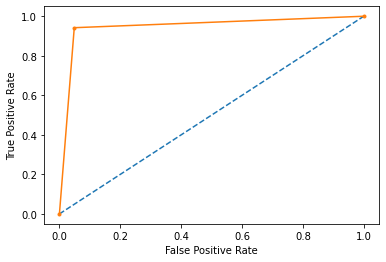

In [38]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_logreg)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for `SVC`

In [39]:
# generate the classification report
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       123
           1       0.78      0.83      0.80        69

    accuracy                           0.85       192
   macro avg       0.84      0.85      0.84       192
weighted avg       0.86      0.85      0.86       192



AUC: 0.848
True Positive Rate: [0.         0.82608696 1.        ] 
False Positive Rate: [0.        0.1300813 1.       ] 
Thresholds: [2 1 0]


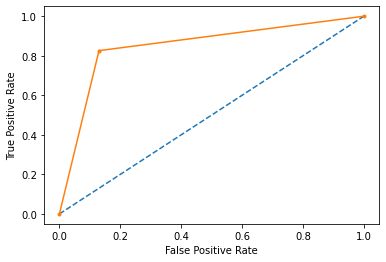

In [40]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for `Decision Tree`

In [41]:
# generate the classification report
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       123
           1       0.92      0.97      0.94        69

    accuracy                           0.96       192
   macro avg       0.95      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192



AUC: 0.961
True Positive Rate: [0.         0.97101449 1.        ] 
False Positive Rate: [0.         0.04878049 1.        ] 
Thresholds: [2 1 0]


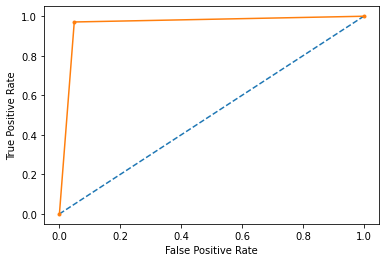

In [42]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for `Random Forest Classifier`

In [43]:
# generate the classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       123
           1       0.95      1.00      0.97        69

    accuracy                           0.98       192
   macro avg       0.97      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192



AUC: 0.984
True Positive Rate: [0. 1. 1.] 
False Positive Rate: [0.         0.03252033 1.        ] 
Thresholds: [2 1 0]


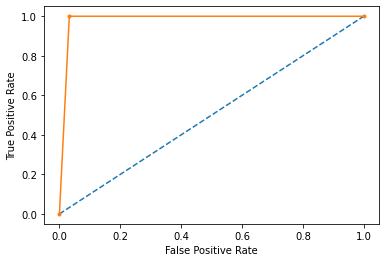

In [44]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for `KNeighborsClassifier`

In [45]:
# generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       123
           1       0.91      0.97      0.94        69

    accuracy                           0.95       192
   macro avg       0.94      0.96      0.95       192
weighted avg       0.96      0.95      0.95       192



AUC: 0.957
True Positive Rate: [0.         0.94202899 1.        ] 
False Positive Rate: [0.         0.04878049 1.        ] 
Thresholds: [2 1 0]


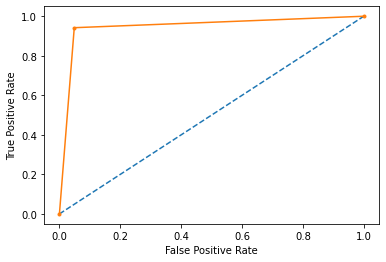

In [46]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()